/tmp/ipython-input-2870218800.py:24: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset Shape: (569, 33)

=== KNN Performance ===
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



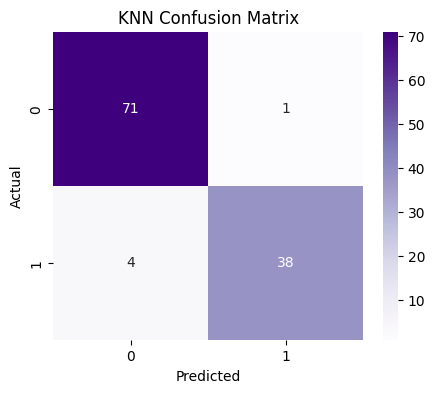

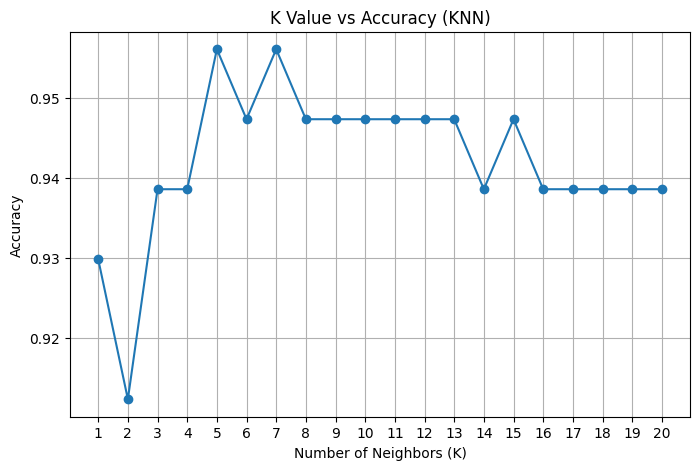

In [1]:
# =========================
# K-Nearest Neighbors (KNN) Classification
# Breast Cancer Dataset (KaggleHub)
# =========================

!pip install kagglehub -q

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------
# Load Dataset (Stable KaggleHub Syntax)
# -------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv"
)

print("Dataset Shape:", df.shape)
df.head()

# -------------------------
# Data Preprocessing
# -------------------------
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling (VERY important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# KNN Model (k = 5)
# -------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# -------------------------
# Performance Evaluation
# -------------------------
print("\n=== KNN Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# -------------------------
# Confusion Matrix
# -------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Purples")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# Hyperparameter Tuning: K vs Accuracy
# -------------------------
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, preds))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy (KNN)")
plt.xticks(k_values)
plt.grid(True)
plt.show()